In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
np.random.randint(0,100)

57

In [3]:
a = np.arange(10)
np.random.choice(a,5,replace=True)

array([5, 8, 3, 1, 8])

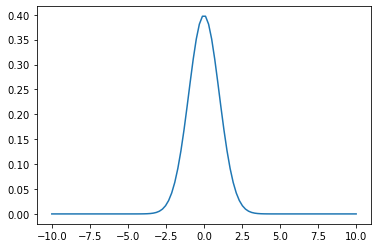

In [4]:
dist_norm = stats.norm(loc=0,scale=1)
x = np.linspace(-10,10,100)
y = dist_norm.pdf(x)

plt.plot(x,y)
plt.show()

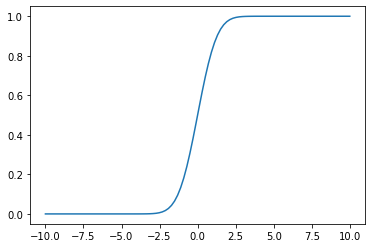

In [5]:
y2 = dist_norm.cdf(x)

plt.plot(x,y2)
plt.show()

In [6]:
a = dist_norm.ppf(0.05)
b = dist_norm.ppf(0.95)
print(a, b)

-1.6448536269514729 1.6448536269514722


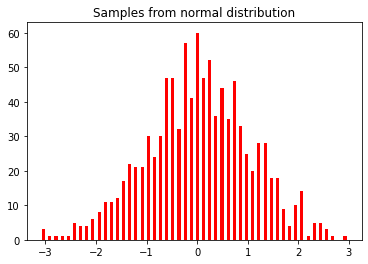

In [7]:
sample_norm = dist_norm.rvs(size=1000)
plt.hist(sample_norm,bins=50,rwidth=0.5,color='r')
plt.title("Samples from normal distribution")
plt.show()

In [8]:
sample_mean = np.mean(sample_norm)
sample_var = np.std(sample_norm)
print(sample_mean,sample_var)

0.032040228719474886 1.0236651306393865


In [9]:
data = pd.read_csv('./sample.csv',header=None)
data.head()

,0
0,109.0
1,110.0
2,108.0
3,110.0
4,109.0


In [10]:
data.columns = ['IQ']
data_list = data['IQ'].to_list()
print(data_list)

[109.0, 110.0, 108.0, 110.0, 109.0, 111.0, 111.0, 110.0, 109.0, 111.0, 109.0, 110.0, 110.0, 108.0, 109.0, 110.0, 109.0, 110.0, 110.0, 110.0, 110.0, 109.0, 110.0, 110.0, 110.0, 112.0, 110.0, 109.0, 108.0, 109.0]


In [11]:
pop_mean0 = 100
pop_std = np.sqrt(80)

n = data.shape[0]

sample_mean = np.mean(data_list)
sample_var = np.var(data_list,ddof=1)

T = (sample_mean - pop_mean0) / (pop_std/np.sqrt(n))

print("Test statistic is {}".format(np.round(T,3)))

Test statistic is 5.92


In [12]:
alpha = 0.05
dist_norm = stats.norm(loc=0,scale=1)

ll = dist_norm.ppf(alpha/2)
ul = dist_norm.ppf(1-(alpha/2))

print("critical values are {} and {}".format(np.round(ll,3),np.round(ul,3)))

critical values are -1.96 and 1.96


In [13]:
if (np.abs(T) > ul):
    print("we can reject H0")
else:
    print("we accept H0")

we can reject H0


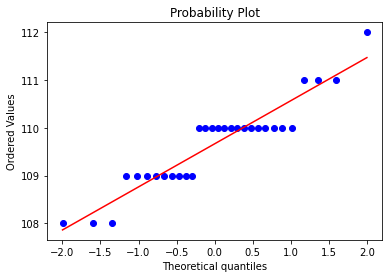

In [14]:
stats.probplot(data_list,plot=plt,dist='norm')
plt.show()

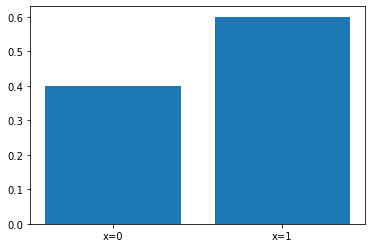

In [15]:
m = 0.6
dist_ber = stats.bernoulli(m)
x = [0,1]
plt.bar(x,dist_ber.pmf(x))
plt.xticks([0, 1], ["x=0", "x=1"])
plt.show()

In [16]:
ber_sample = dist_ber.rvs(1000)
print(ber_sample)
print(np.mean(ber_sample))
print(np.var(ber_sample,ddof=1))

[0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 0 1 1 1 1 

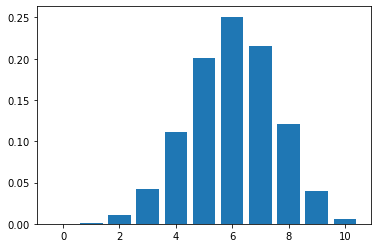

In [17]:
n = 10
m = 0.6
dist_bin = stats.binom(n,m)
x = np.arange(n+1)
y = dist_bin.pmf(x)
plt.bar(x,y)
plt.show()

In [18]:
sample = dist_bin.rvs(1000)
print(sample)

[ 6  7  9  2  5  6  3  6  6  4  2  4  7  2  8  6  4  4  4  8  7  5  7  4
  4  7  5  7  7  7  5  8  7  6  4  6  9  5  5  5  4  6  3  7  4  7  8  6
  5  9  4  8  9  8  5  7  9  4  4  8  5  7  4  7  4  6  7  9  8  6  9  7
  3  6  6  7  6  9  6  5  6  4  5  7  5  6  7  4  7  5  8  6  4  7  4  9
  4  5  5  7  7  3  7  7  5  7  6  7  6  8  4  7  8  4  6  4  6  6  4  7
  7  6  5  9  6  5  4  6  5  6  9  6  5  7  5  5  6  4  4  4  4  7  4  7
  9  4  8  4  5  5  6  8  7  5  2  7  6  7  7  8  7  6  8  5  3  8  5  6
  7  7  9  5  7  3 10  3  4  8  2  6  8  5  5  5  7  3  8  5  7  8  6  6
  4  4  7  6  6  7  4  5  6  8  6  6  9  4  7  6  4  6  6  4  5  6  6  6
  7  6  7  8  5  7  6  7  5  7  4  3  7  6  8  7  7  6  4  4  7  5  5  8
  8  4  5  3  4  5  7  7  6  5  3  5  8  5  5  8  5  6  9  7  6  5  7  5
  7  4  6  6  7 10  5  7  7  5  9  6  7  4  7  6  6  8  7  6  7  6  7  7
  3  7  2  8  7  7  4  5  8  5  7  5  5  8  8  4  5  8  8  4  7  4  7  6
  5  8  7  6  2  6  6  8  7  4  6  6  6  5  8  4  5

In [19]:
c = np.bincount(sample)
l = []

for bin in c:
    l.append(bin/1000)
l.append(0)
print(l)

[0.0, 0.001, 0.018, 0.041, 0.137, 0.195, 0.232, 0.221, 0.115, 0.035, 0.005, 0]


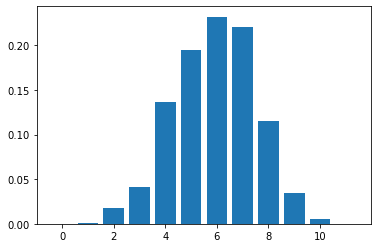

In [20]:
plt.bar(np.arange(n+2),l)
plt.show()

In [21]:
print(np.mean(sample))
print(np.var(sample,ddof=1))

5.907
2.494845845845845
